## DisneyLand EPCOT case study 

[DisneyLand's epcot theme park](https://disneyworld.disney.go.com/attractions/epcot/journey-of-water/) celebrated the 100th Walt Disney Anniversary on 16 Sep 2023. Alongside this celebration was the opening of the Moana themed 'Journey of Water'. According to [Figure 1](#EPCOT), we can see the overall trend of average crowd levels (orange smoothed curve) has increased by 55% from the end of 2023 Sep to the end of 2024 March. This is an implicit indicator of a successful campaign that increased the number of visitors to Epcot theme park. 

#### Figure 1: Trend plot of Epcot's monthly crowd level from 2023 to 2024 

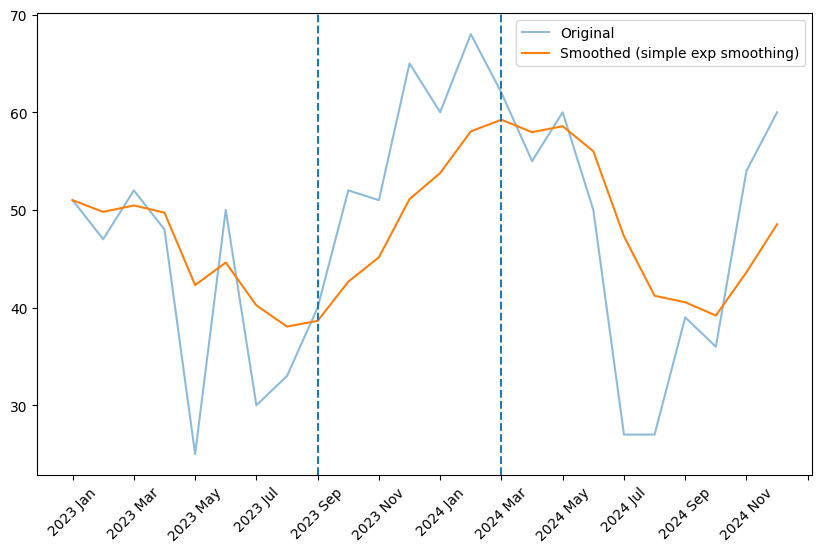

In [1]:
%run s06_analysis_avg_crowd.py

time_series_epcot = get_time_series_epcot(df_crowd)
get_exp_smoothed_plot(time_series_epcot)

## Disney Hollywood Studios case study 

[Disney’s Hollywood Studios](https://blooloop.com/theme-park/news/toy-story-land-hollywood-studios-disney) opened Toy Story Land in 30 June 2018. According to [Table 1](#hollywood), we can see the overall trend of average crowd levels (orange smoothed curve) has increased by 55% from the end of 2023 Sep to the end of 2024 March. This is an implicit indicator of a successful campaign that increased the number of visitors to Epcot theme park. 

   date  yoy_growth
0  2015         4.8
1  2016        -0.5
2  2017        -0.5
3  2018         4.8


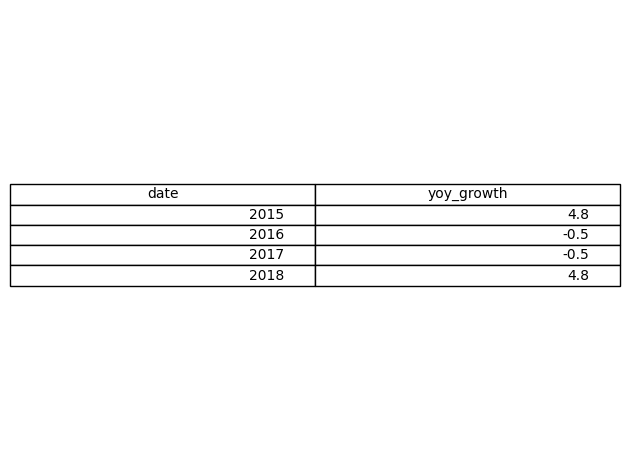

In [28]:
get_hollywood_2018_yoy_growth_table_new(df_attendee)

##

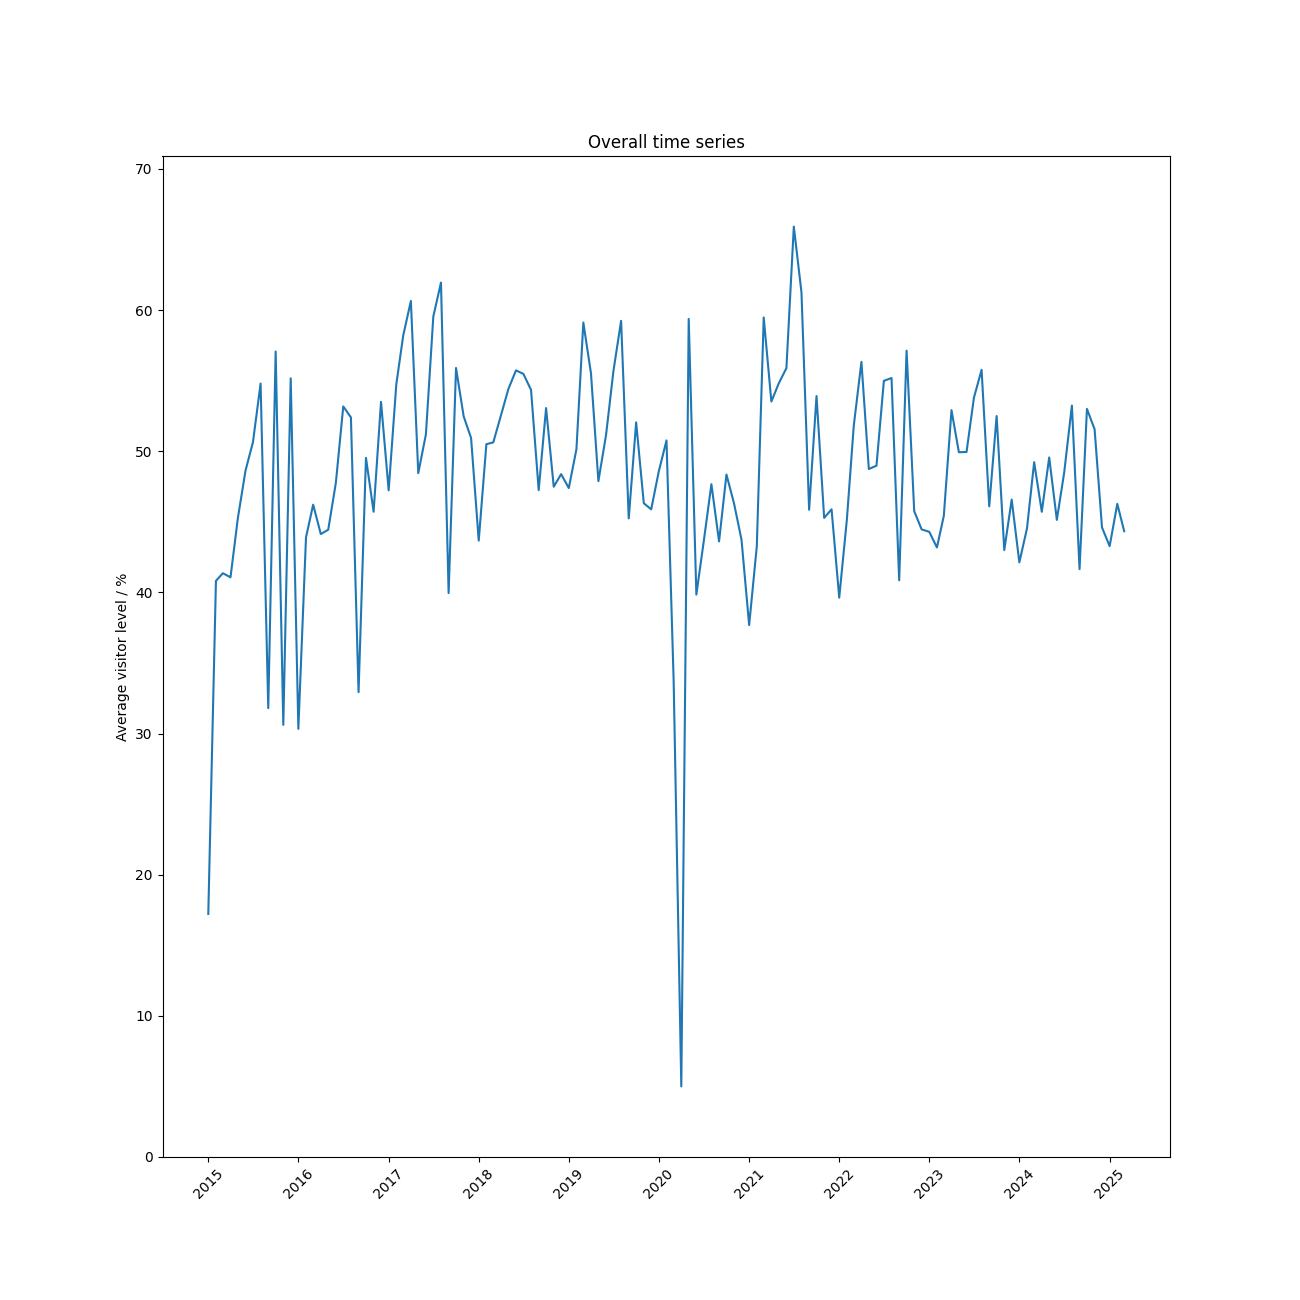

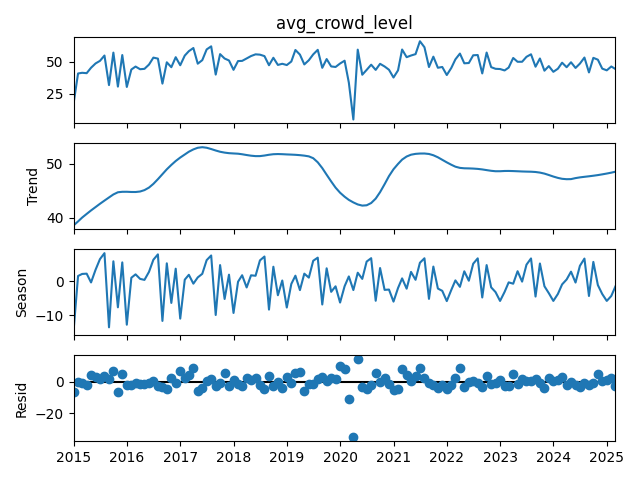

In [ ]:
from s03_analysis_time_series import peak_month,trough_month
from IPython.display import Image, display

display(Image(filename='../other/overall_trend_time_series.png'), \
Image(filename='../other/overall_STL_decomposition.png'))


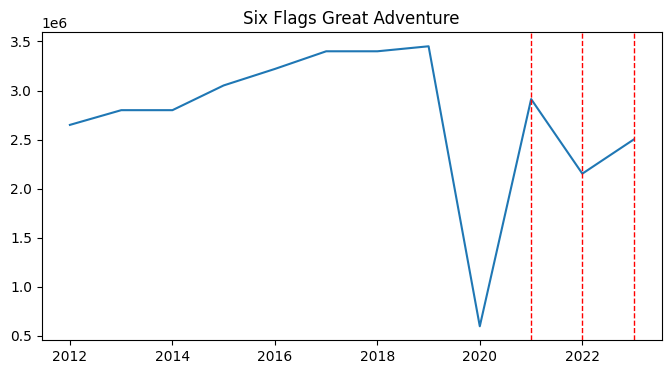

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# avg_crowd_data = pd.read_csv('../data/raw/avg_crowd.csv', na_values='NA')
# avg_crowd_data = avg_crowd_data.loc[avg_crowd_data['name'] == 'Disneyland Park Paris', :]

# avg_crowd_data['month'] = avg_crowd_data['month'].apply(lambda mon: list(calendar.month_abbr).index(mon))
# avg_crowd_data['date'] = pd.to_datetime(avg_crowd_data[['year', 'month']].assign(day=1))
# avg_crowd_data = avg_crowd_data.loc[avg_crowd_data['date'] <= pd.Timestamp('today'), ]
# avg_crowd_data = avg_crowd_data.sort_values('date')

# fig, ax = plt.subplots(figsize = (13, 13))
# ax.plot(avg_crowd_data['date'], avg_crowd_data['avg_crowd_level'])  


total_attendee_data =  pd.read_csv('../data/raw/attendee.csv')
total_attendee_data['date'] = pd.to_datetime(total_attendee_data[['year']].assign(day=1, month=1))

def get_plots(total_attendee_data, park_name, years=[]):
    data = total_attendee_data.loc[total_attendee_data['name'].str.contains(park_name)]
    data = data.sort_values('date')
    #print(data)
    fig, ax = plt.subplots(figsize = (8, 4))
    ax.plot(data['date'], data['attendee_count'])
    ax.set_title(f'{data.get('name').unique()[0]}')  
    
    year_lst = [pd.Timestamp(year=year, month=1, day=1) for year in years]
    for timestamp in year_lst:
        plt.axvline(x=timestamp, color='red', linestyle='--', linewidth=1)
    
    plt.show()

# # disney_paris_data = total_attendee_data.loc[total_attendee_data['name'] == 'Disneyland Park Paris']
# # epcot_data = total_attendee_data.loc[total_attendee_data['name'].str.contains('Epcot')]

# epcot_data = epcot_data.sort_values('date')
# print(epcot_data.shape)

# 2021 - 2023 campaign "The World’s Most Magical Celebration"
# get_plots(total_attendee_data, 'Epcot', list(range(2020,2024)))

# # 2018 campaign "Magic Everywhere"
# get_plots(total_attendee_data, 'Disneyland Park Paris', [2017,2018,2019])

# # 2023 campaign "Ignite the Magic"
# get_plots(total_attendee_data, 'Shanghai Disney Resort', list(range(2021,2024)))

get_plots(total_attendee_data, 'Six Flags Great Adventure', list(range(2021,2024)))
# fig, ax = plt.subplots(figsize = (13, 13))
# ax.plot(epcot_data['date'], epcot_data['attendee_count'])  

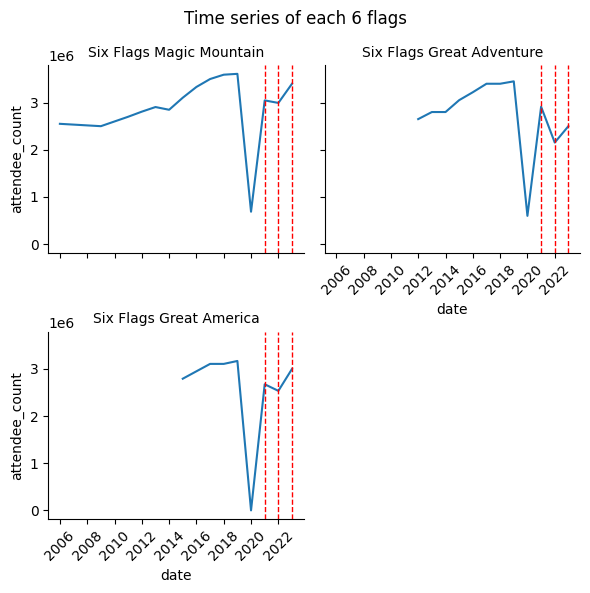

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

total_attendee_data =  pd.read_csv('../data/raw/attendee.csv')
total_attendee_data['date'] = pd.to_datetime(total_attendee_data[['year']].assign(day=1, month=1))

def get_plots(total_attendee_data, park_name, years=[]):
    data = total_attendee_data.loc[total_attendee_data['name'].str.contains(park_name)]
    data = data[data['name'].isin(['Six Flags Magic Mountain', 'Six Flags Great Adventure','Six Flags Great America'])]
    data = data.sort_values('date')
    
    
    g = sns.FacetGrid(data, col='name', col_wrap = 2)
    g = g.map(plt.plot, 'date', 'attendee_count')
    year_lst = [pd.Timestamp(year=year, month=1, day=1) for year in years]
    
    for ax in g.axes.flat:
        plt.sca(ax)
        plt.xticks(rotation = 45)
        for timestamp in year_lst:
            plt.axvline(x=timestamp, color='red', linestyle='--', linewidth=1)
    
    g = g.set_titles('{col_name}')
    g = g.fig.suptitle('Time series of each 6 flags')
    
    plt.tight_layout()
    plt.show()
    # fig, ax = plt.subplots(figsize = (8, 4))
    # ax.plot(data['date'], data['attendee_count'])
    # ax.set_title)
    # ax.set_xticks(rotation=45)
    
    # year_lst = [pd.Timestamp(year=year, month=1, day=1) for year in years]
    # for timestamp in year_lst:
    #     plt.axvline(x=timestamp, color='red', linestyle='--', linewidth=1)
    
    

# # disney_paris_data = total_attendee_data.loc[total_attendee_data['name'] == 'Disneyland Park Paris']
# # epcot_data = total_attendee_data.loc[total_attendee_data['name'].str.contains('Epcot')]

# epcot_data = epcot_data.sort_values('date')
# print(epcot_data.shape)

# 2021 - 2023 campaign "The World’s Most Magical Celebration"
# get_plots(total_attendee_data, 'Epcot', list(range(2020,2024)))

# # 2018 campaign "Magic Everywhere"
# get_plots(total_attendee_data, 'Disneyland Park Paris', [2017,2018,2019])

# # 2023 campaign "Ignite the Magic"
# get_plots(total_attendee_data, 'Shanghai Disney Resort', list(range(2021,2024)))

get_plots(total_attendee_data, 'Six Flags', list(range(2021,2024)))

# fig, ax = plt.subplots(figsize = (13, 13))
# ax.plot(epcot_data['date'], epcot_data['attendee_count'])  

After the campaign year, total attendance drop

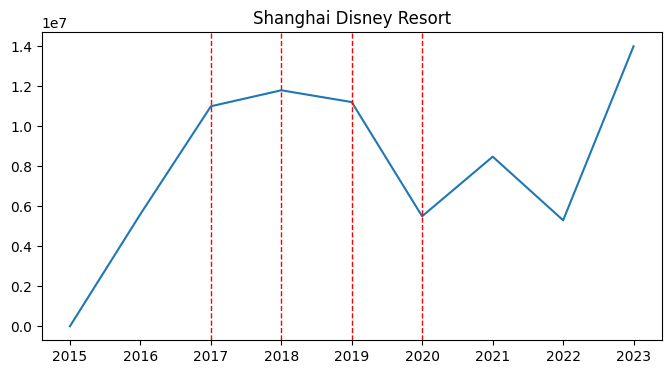

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

total_attendee_data =  pd.read_csv('../data/raw/attendee.csv')
total_attendee_data['date'] = pd.to_datetime(total_attendee_data[['year']].assign(day=1, month=1))

def get_plots(total_attendee_data, park_name, years=[]):
    data = total_attendee_data.loc[total_attendee_data['name'].str.contains(park_name)]
    data = data.sort_values('date')

    fig, ax = plt.subplots(figsize = (8, 4))
    ax.plot(data['date'], data['attendee_count'])
    ax.set_title(f'{data.get('name').unique()[0]}')  
    
    year_lst = [pd.Timestamp(year=year, month=1, day=1) for year in years]
    for timestamp in year_lst:
        plt.axvline(x=timestamp, color='red', linestyle='--', linewidth=1)
    
    plt.show()
    
get_plots(total_attendee_data, 'Shanghai Disney', list(range(2017,2021)))

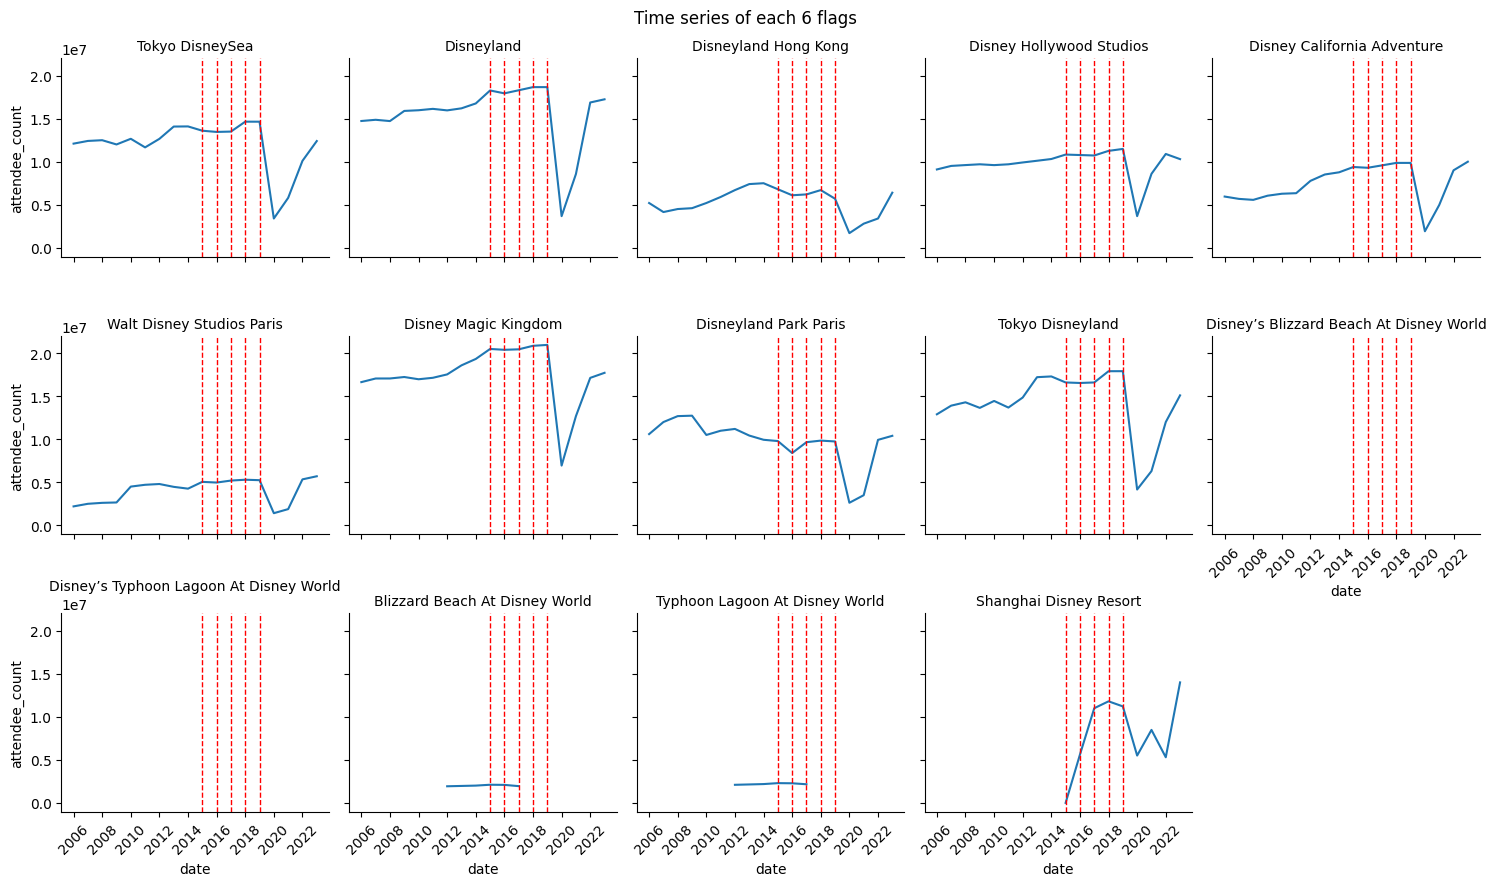

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

total_attendee_data =  pd.read_csv('../data/raw/attendee.csv')
total_attendee_data['date'] = pd.to_datetime(total_attendee_data[['year']].assign(day=1, month=1))

def get_plots(total_attendee_data, park_name, years=[]):
    data = total_attendee_data.loc[total_attendee_data['name'].str.contains(park_name)]
    data = data.sort_values('date')
    
    
    g = sns.FacetGrid(data, col='name', col_wrap = 5)
    g = g.map(plt.plot, 'date', 'attendee_count')
    year_lst = [pd.Timestamp(year=year, month=1, day=1) for year in years]
    
    for ax in g.axes.flat:
        plt.sca(ax)
        plt.xticks(rotation = 45)
        for timestamp in year_lst:
            plt.axvline(x=timestamp, color='red', linestyle='--', linewidth=1)
    
    g = g.set_titles('{col_name}')
    g = g.fig.suptitle('Time series of each 6 flags')
    
    plt.tight_layout()
    plt.show()
    # fig, ax = plt.subplots(figsize = (8, 4))
    # ax.plot(data['date'], data['attendee_count'])
    # ax.set_title)
    # ax.set_xticks(rotation=45)
    
    # year_lst = [pd.Timestamp(year=year, month=1, day=1) for year in years]
    # for timestamp in year_lst:
    #     plt.axvline(x=timestamp, color='red', linestyle='--', linewidth=1)
    
    

# # disney_paris_data = total_attendee_data.loc[total_attendee_data['name'] == 'Disneyland Park Paris']
# # epcot_data = total_attendee_data.loc[total_attendee_data['name'].str.contains('Epcot')]

# epcot_data = epcot_data.sort_values('date')
# print(epcot_data.shape)

# 2021 - 2023 campaign "The World’s Most Magical Celebration"
# get_plots(total_attendee_data, 'Epcot', list(range(2020,2024)))

# # 2018 campaign "Magic Everywhere"
# get_plots(total_attendee_data, 'Disneyland Park Paris', [2017,2018,2019])

# # 2023 campaign "Ignite the Magic"
# get_plots(total_attendee_data, 'Shanghai Disney Resort', list(range(2021,2024)))

get_plots(total_attendee_data, 'Disney', list(range(2015,2020)))

# fig, ax = plt.subplots(figsize = (13, 13))
# ax.plot(epcot_data['date'], epcot_data['attendee_count'])  

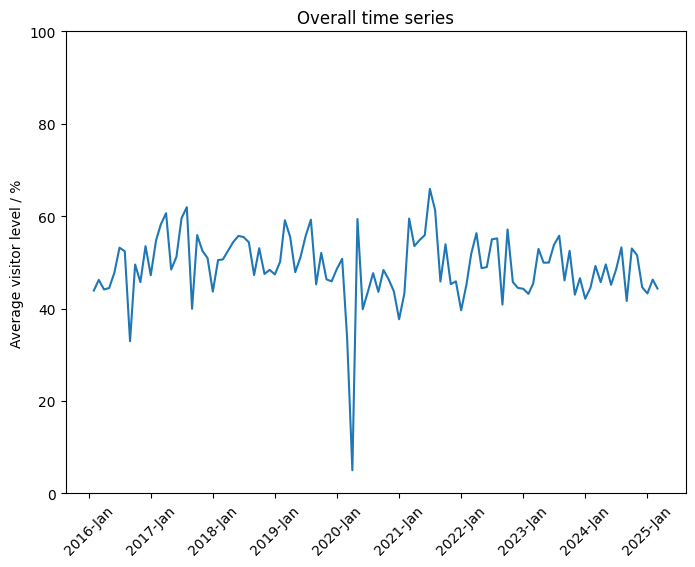

In [1]:
%run s06_analysis_avg_crowd
%run s03_analysis_time_series
plot_overall_avg_crowd_level(df_crowd)

## Epcot: Journey of Water (Revamp) --- Good

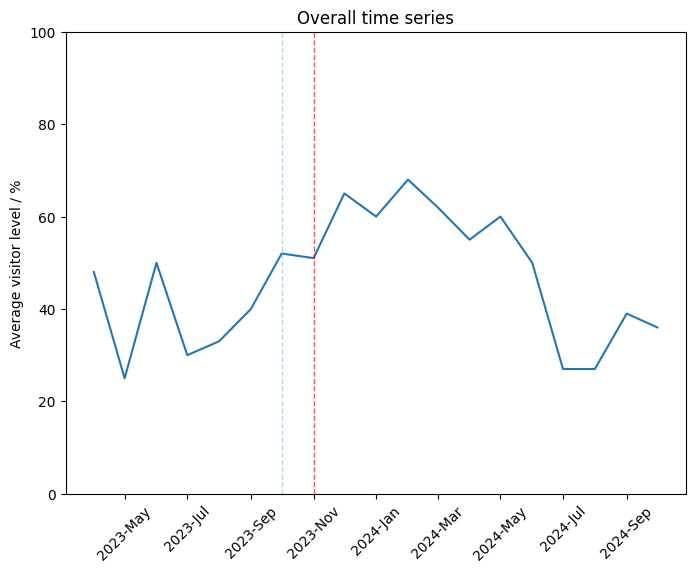

In [2]:
%run s03_analysis_time_series

get_actual_data(df_crowd, 'Epcot', pd.to_datetime('2023-10-01'), 1)
#get_trend(df_crowd, 'Epcot', pd.to_datetime('2023-10-01'), 7)


## Epcot: Guardians of the Galaxy, Cosmic Rewind (Roller Coaster) --- mid

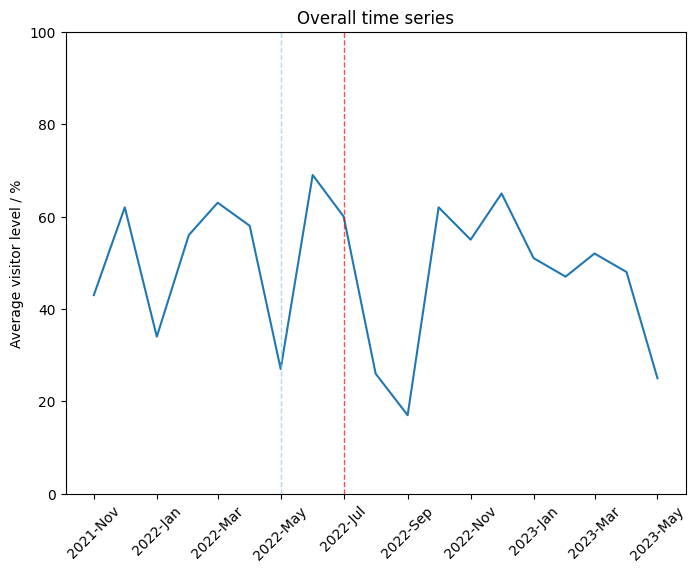

In [3]:
%run s03_analysis_time_series

get_actual_data(df_crowd, 'Epcot', pd.to_datetime('2022-05-01'), 2)
#get_trend(df_crowd, 'Epcot', pd.to_datetime('2022-05-01'), 7)


## Disney Magic Kingdom: Tron Light Cycle Run (Roller coaster) --- bad

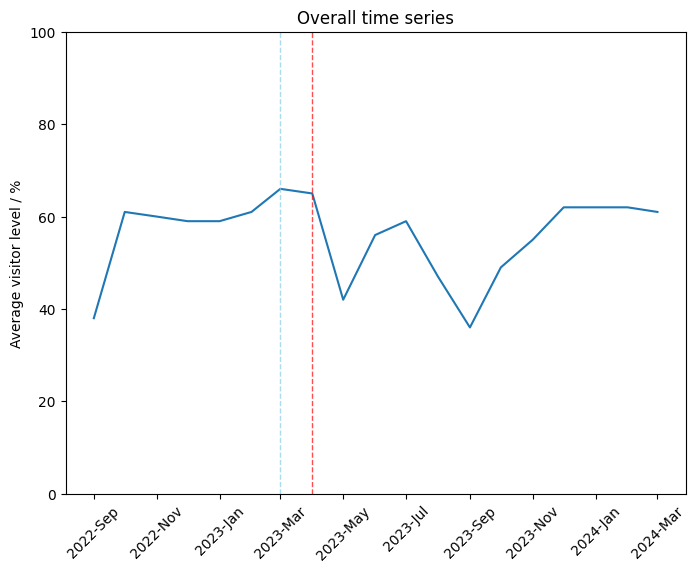

In [4]:
%run s03_analysis_time_series                                            (mk_avg_crowd_df['date'] < '2024-04-01')]

get_actual_data(df_crowd, 'Disney Magic Kingdom', pd.to_datetime('2023-03-01'), 1)
#get_trend(df_crowd, 'Disney Magic Kingdom', pd.to_datetime('2023-04-01'), 0)


## Tokyo DisneySea: Fantasy Spring opening (Revamp) --- good

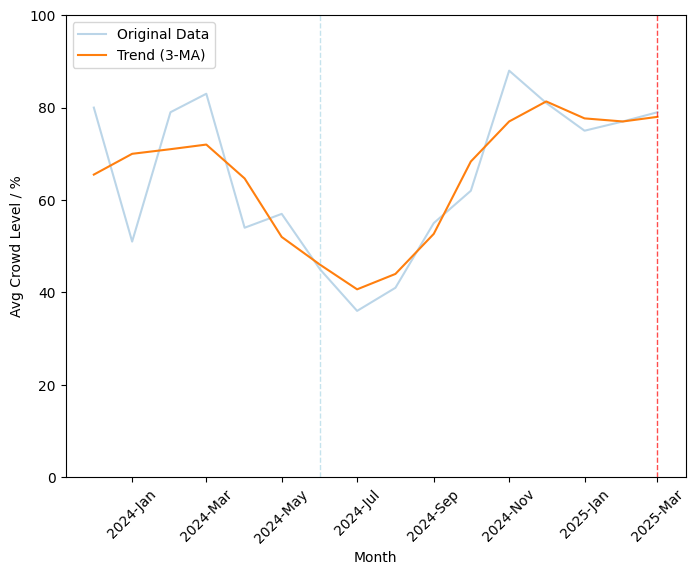

In [5]:
%run s03_analysis_time_series

get_trend(df_crowd, 'Tokyo DisneySea', pd.to_datetime('2024-06-01'), 9)

## Universal Orlando: Halloween Horror Nights 2022 to 2024 (Event) -- mid

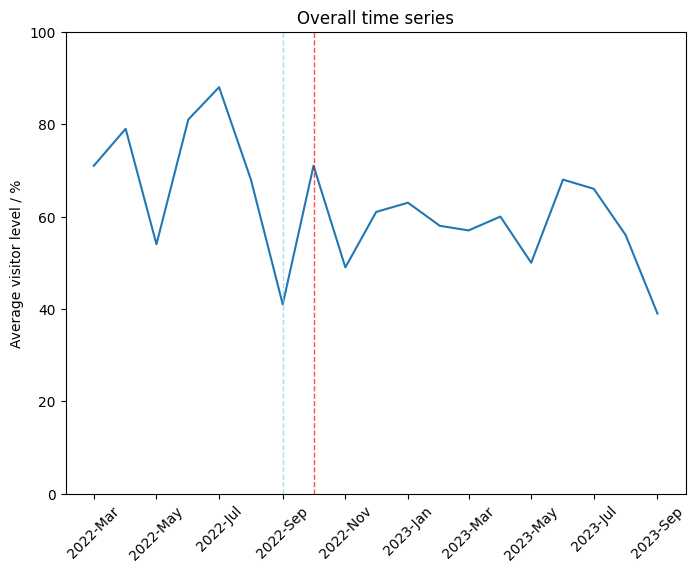

In [6]:
%run s03_analysis_time_series
    
get_actual_data(df_crowd, 'Universal Studios At Universal Orlando', pd.to_datetime('2022-09-01'), 1)
#get_trend(df_crowd, 'Universal Studios At Universal Orlando', pd.to_datetime('2022-09-01'), 1)

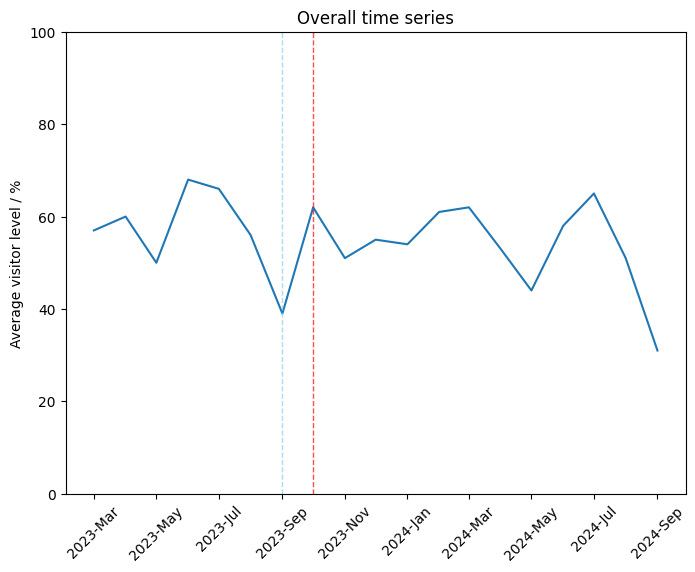

In [7]:
%run s03_analysis_time_series
    
get_actual_data(df_crowd, 'Universal Studios At Universal Orlando', pd.to_datetime('2023-09-01'), 1)
#get_trend(df_crowd, 'Universal Studios At Universal Orlando', pd.to_datetime('2022-09-01'), 1)

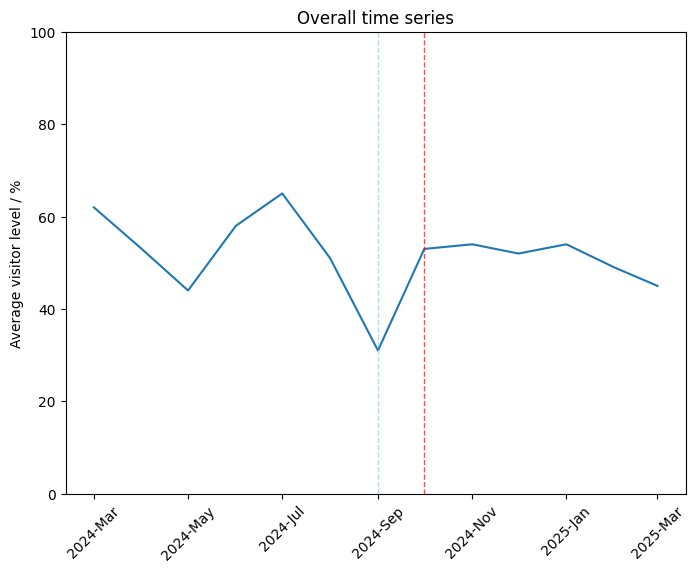

In [8]:
%run s03_analysis_time_series
    
get_actual_data(df_crowd, 'Universal Studios At Universal Orlando', pd.to_datetime('2024-09-01'), 1)
#get_trend(df_crowd, 'Universal Studios At Universal Orlando', pd.to_datetime('2022-09-01'), 1)

## Universal Orlando: DreamWorks Land (revamp) --- bad

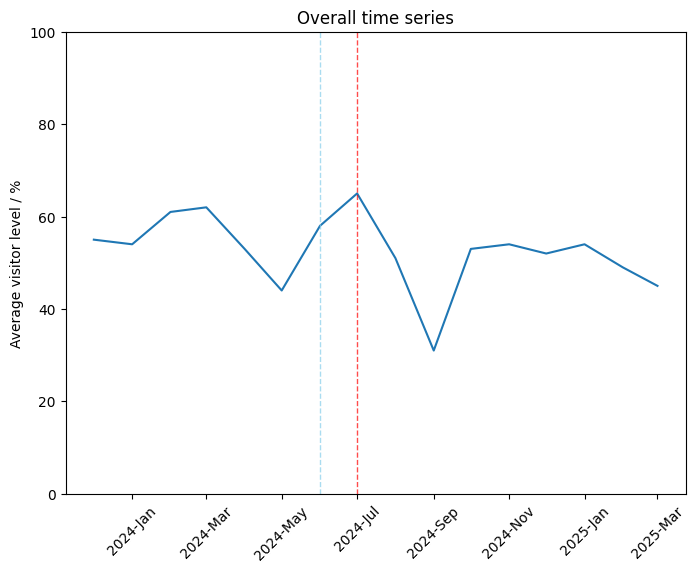

In [9]:
%run s03_analysis_time_series
    
get_actual_data(df_crowd, 'Universal Studios At Universal Orlando', pd.to_datetime('2024-06-01'), 1)
#get_trend(df_crowd, 'Universal Studios At Universal Orlando', pd.to_datetime('2022-09-01'), 1)

## Six Flags Magic Mountain: Freight Fest (Halloween) -- Good

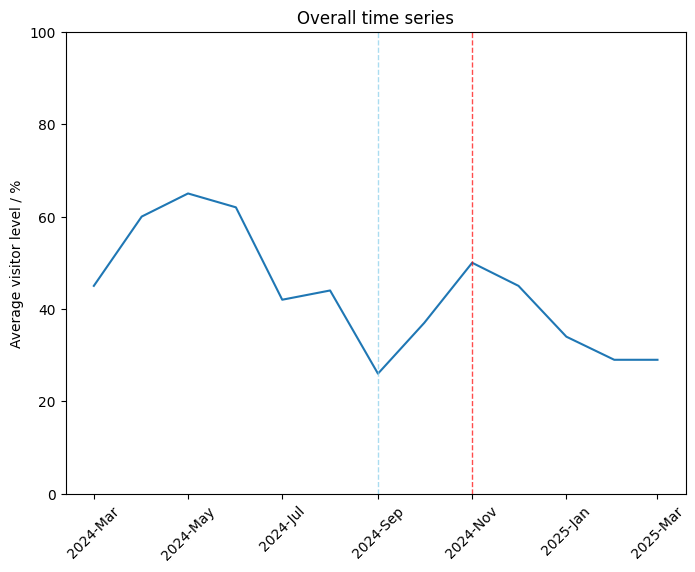

In [10]:
%run s03_analysis_time_series
    
get_actual_data(df_crowd, 'Six Flags Magic Mountain', pd.to_datetime('2024-09-01'), 2)
#get_trend(df_crowd, 'Universal Studios At Universal Orlando', pd.to_datetime('2022-09-01'), 1)

## Seaworld Orlando: Ice Breaker (Roller Coaster) --- Good 

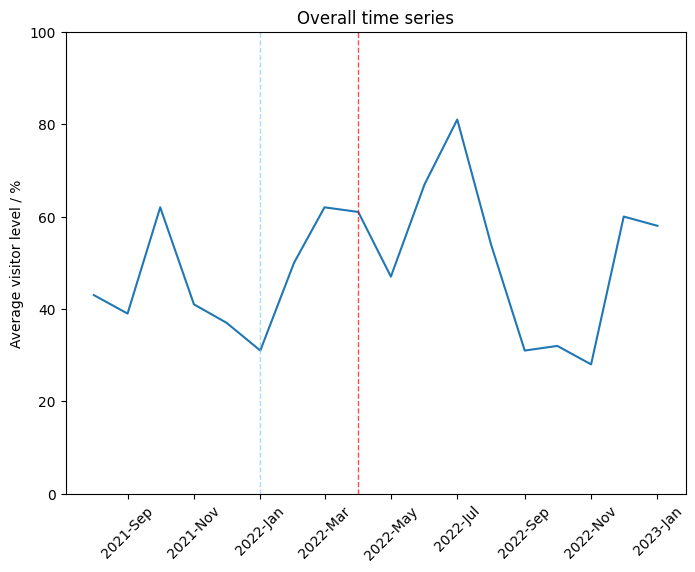

In [11]:
%run s03_analysis_time_series
    
get_actual_data(df_crowd, 'Seaworld Orlando', pd.to_datetime('2022-01-01'), 3)
#get_trend(df_crowd, 'Universal Studios At Universal Orlando', pd.to_datetime('2022-09-01'), 1)

## Seaworld Orlando: Pipeline, The Surf Coaster (Roller Coaster) --- Good

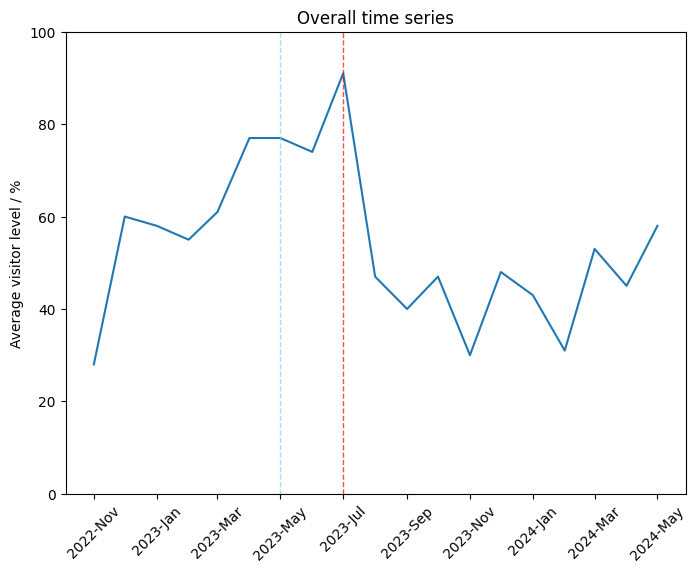

In [12]:
%run s03_analysis_time_series
    
get_actual_data(df_crowd, 'Seaworld Orlando', pd.to_datetime('2023-05-01'), 2)
#get_trend(df_crowd, 'Universal Studios At Universal Orlando', pd.to_datetime('2022-09-01'), 1)

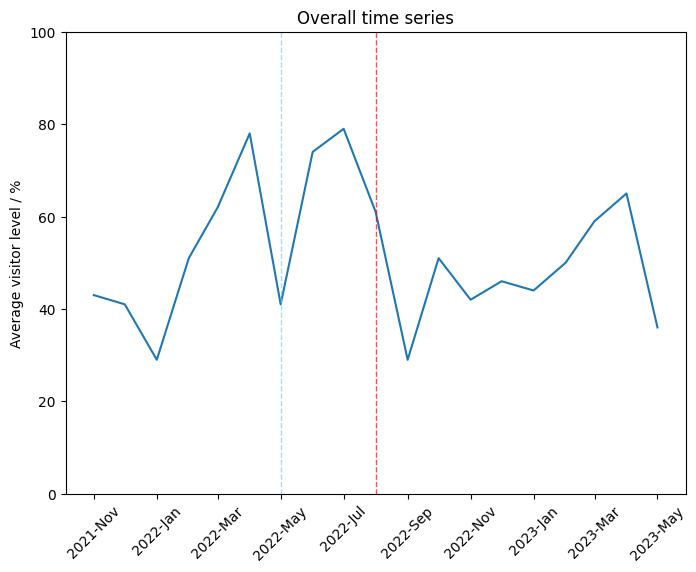

In [13]:
%run s03_analysis_time_series
    
get_actual_data(df_crowd, 'Legoland California', pd.to_datetime('2022-05-01'), 3)
#get_trend(df_crowd, 'Universal Studios At Universal Orlando', pd.to_datetime('2022-09-01'), 1)

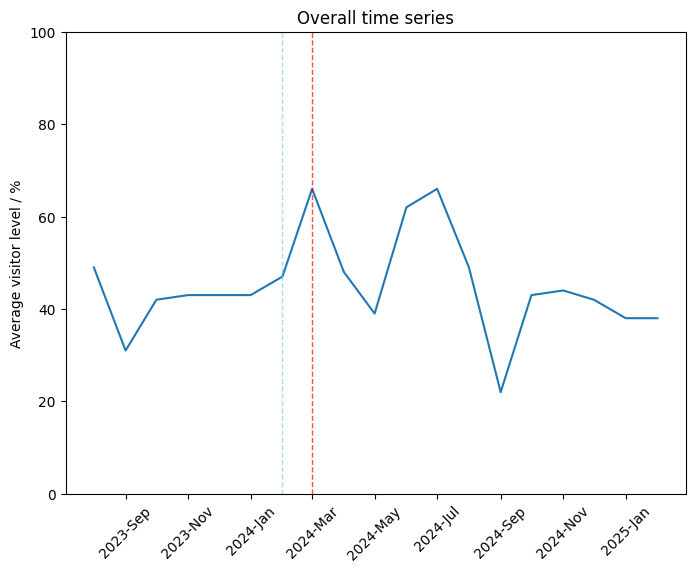

In [14]:
%run s03_analysis_time_series
    
get_actual_data(df_crowd, 'Legoland California', pd.to_datetime('2024-02-01'), 1)
#get_trend(df_crowd, 'Universal Studios At Universal Orlando', pd.to_datetime('2022-09-01'), 1)

Disney Magic Kingdom: Tron Light Cycle Run
-------------------------------
                     name  year  month  avg_crowd_level       date  \
722  Disney Magic Kingdom  2023      3             66.0 2023-03-01   
723  Disney Magic Kingdom  2023      4             65.0 2023-04-01   

     seasonal_avg  trend_avg  
722          88.0      -22.0  
723          78.0      -13.0  
------------------------------- 

absolute lift of campaign: 9.0
percentage lift of campaign: 40.9%
Epcot: Journey Of Water
-------------------------------
      name  year  month  avg_crowd_level       date  seasonal_avg  trend_avg
585  Epcot  2023     10             52.0 2023-10-01          62.0      -10.0
586  Epcot  2023     11             51.0 2023-11-01          55.0       -4.0
------------------------------- 

absolute lift of campaign: 6.0
percentage lift of campaign: 60.0%
Tokyo DisneySea: Fantasy Spring
-------------------------------
                 name  year  month  avg_crowd_level       date  season

c:\Users\chris\OneDrive\Personal\Education\Y3S2\courses\DSA3101\DSA3101_Group8_Project1\A4_MarketingAnalysis\script\s06_analysis_avg_crowd.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mk_df['month'] = [list(month_abbr).index(month) for month in mk_df['month']]
c:\Users\chris\OneDrive\Personal\Education\Y3S2\courses\DSA3101\DSA3101_Group8_Project1\A4_MarketingAnalysis\script\s06_analysis_avg_crowd.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mk_df['month'] = [list(month_abbr).index(month) f

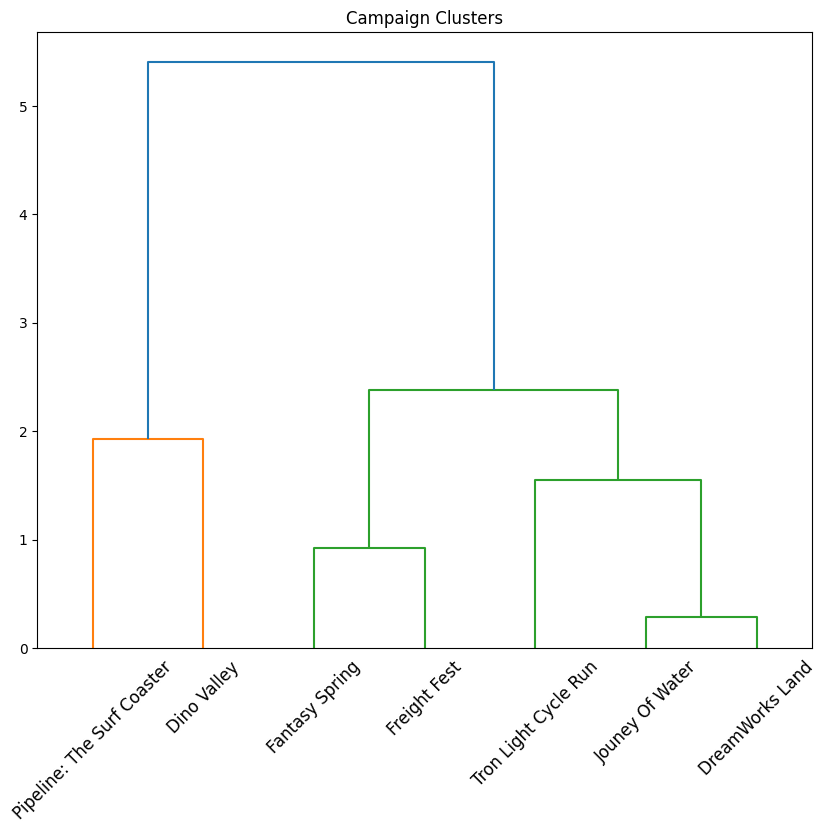

In [33]:
%run s08_kmeans_pca 

plot_dendrogram(campaign_df)

c:\Users\chris\OneDrive\Personal\Education\Y3S2\courses\DSA3101\DSA3101_Group8_Project1\A4_MarketingAnalysis\script\s06_analysis_avg_crowd.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mk_df['month'] = [list(month_abbr).index(month) for month in mk_df['month']]
c:\Users\chris\OneDrive\Personal\Education\Y3S2\courses\DSA3101\DSA3101_Group8_Project1\A4_MarketingAnalysis\script\s06_analysis_avg_crowd.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mk_df['month'] = [list(month_abbr).index(month) f

Disney Magic Kingdom: Tron Light Cycle Run
-------------------------------
                     name  year  month  avg_crowd_level       date  \
722  Disney Magic Kingdom  2023      3             66.0 2023-03-01   
723  Disney Magic Kingdom  2023      4             65.0 2023-04-01   

     seasonal_avg  trend_avg  
722          88.0      -22.0  
723          78.0      -13.0  
------------------------------- 

absolute lift of campaign: 9.0
percentage lift of campaign: 40.9%
Epcot: Journey Of Water
-------------------------------
      name  year  month  avg_crowd_level       date  seasonal_avg  trend_avg
585  Epcot  2023     10             52.0 2023-10-01          62.0      -10.0
586  Epcot  2023     11             51.0 2023-11-01          55.0       -4.0
------------------------------- 

absolute lift of campaign: 6.0
percentage lift of campaign: 60.0%
Tokyo DisneySea: Fantasy Spring
-------------------------------
                 name  year  month  avg_crowd_level       date  season

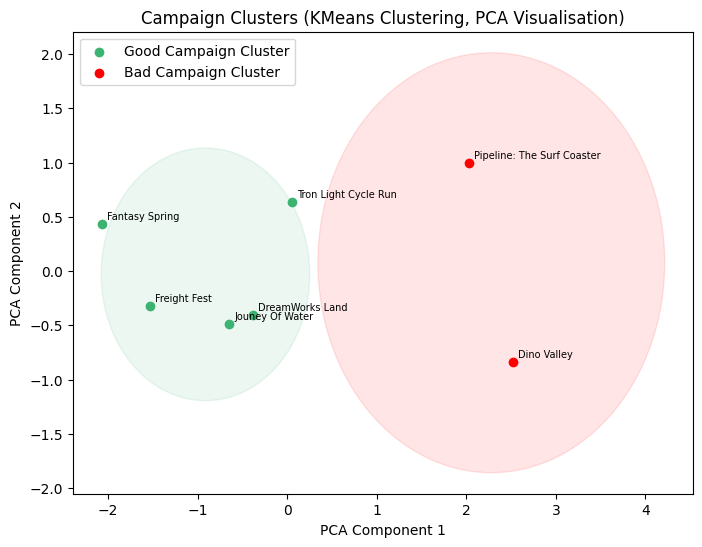

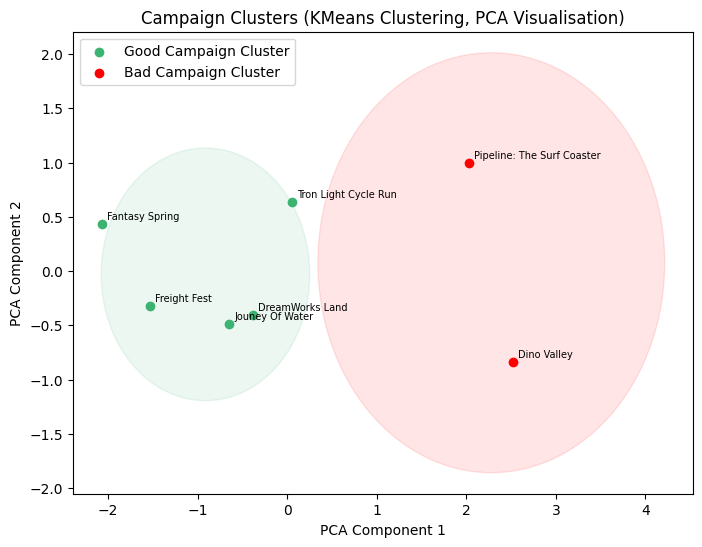

In [37]:
%run s08_kmeans_pca 

plot_clusters(campaign_df)